In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = '../../Data/raw/'
os.listdir(filepath)

['April 2023 Complete Monthly Ridership (with adjustments and estimates)_0.xlsx',
 'aqi_by_state',
 'PET_PRI_GND_DCUS_NUS_W.xls',
 'README.md',
 'real-prices',
 'US_AQI.csv']

In [3]:
transit = pd.ExcelFile(
    filepath + 
    'April 2023 Complete Monthly Ridership (with adjustments and estimates)_0.xlsx'
)

In [4]:
transit.sheet_names

['Read Me',
 'Master',
 'UPT',
 'VRM',
 'VRH',
 'VOMS',
 'UPT Estimates',
 'VRM Estimates',
 'Calendar Year UPT',
 'Calendar Year VRM',
 'Mozart Reports']

### annual sums

In [5]:
upt = transit.parse('Calendar Year UPT')

# drop summary rows at end of excel sheet
upt = upt.dropna(subset=['NTD ID'])

upt_city_sums = upt.groupby('UZA Name').sum()
upt_city_sums = upt_city_sums.drop(columns=['NTD ID', "UZA"])
upt_city_sums = upt_city_sums.T

upt_city_sums.index = pd.to_datetime(upt_city_sums.index, format="%Y")

upt_city_sums = upt_city_sums.rename_axis(index='date')

# 2023 not complete yet, so makes numbers look worse than they are
upt_city_sums = upt_city_sums.loc[:'2022']

# writing to disk
# upt_city_sums.to_csv('../../Data/upt_city_sums.csv')

In [6]:
len(set(upt['UZA Name']))

398

---

In [8]:
# upt['UAC']

In [9]:
# upt['UZA']

---

In [10]:
top_100 = list(
    upt_city_sums
        .sum()
        .sort_values(ascending=False)
        .iloc[0:100]
        .index
)

In [11]:
# upt_city_sums[top_100].to_csv('../../Data/upt_city_sums_top_100.csv')

In [12]:
top_100[:10]

['New York-Newark, NY-NJ-CT',
 'Chicago, IL-IN',
 'Los Angeles-Long Beach-Anaheim, CA',
 'San Francisco-Oakland, CA',
 'Washington--Arlington, DC--VA--MD',
 'Boston, MA-NH-RI',
 'Philadelphia, PA-NJ-DE-MD',
 'Seattle, WA',
 'Miami, FL',
 'Atlanta, GA']

In [13]:
# MINUS NYC
top_15 = list(
    upt_city_sums
        .sum()
        .sort_values(ascending=False)
        .iloc[1:15]
        .index
)

In [14]:
top_15 

['Chicago, IL-IN',
 'Los Angeles-Long Beach-Anaheim, CA',
 'San Francisco-Oakland, CA',
 'Washington--Arlington, DC--VA--MD',
 'Boston, MA-NH-RI',
 'Philadelphia, PA-NJ-DE-MD',
 'Seattle, WA',
 'Miami, FL',
 'Atlanta, GA',
 'Baltimore, MD',
 'Portland, OR-WA',
 'San Diego, CA',
 'Denver-Aurora, CO',
 'Houston, TX']

Text(0, 0.5, 'Number of unlinked passenger trips per city')

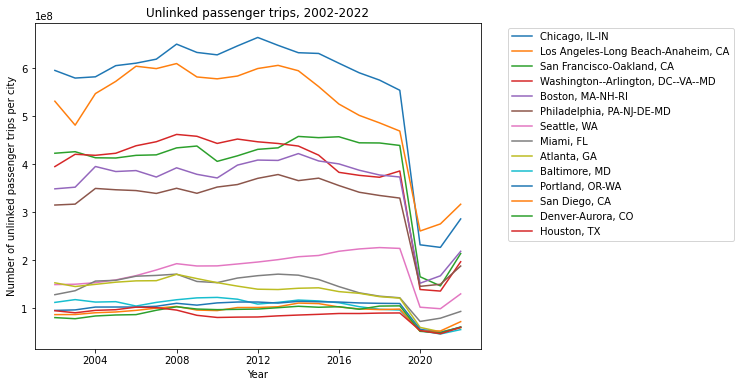

In [15]:
# dim for slides
# plt.figure(figsize=(15,10))

# dim for report
plt.figure(figsize=(8,6))
for city in top_15:
    plt.plot(upt_city_sums[city], label=city)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Unlinked passenger trips, 2002-2022')
plt.xlabel('Year')
plt.ylabel('Number of unlinked passenger trips per city')